In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


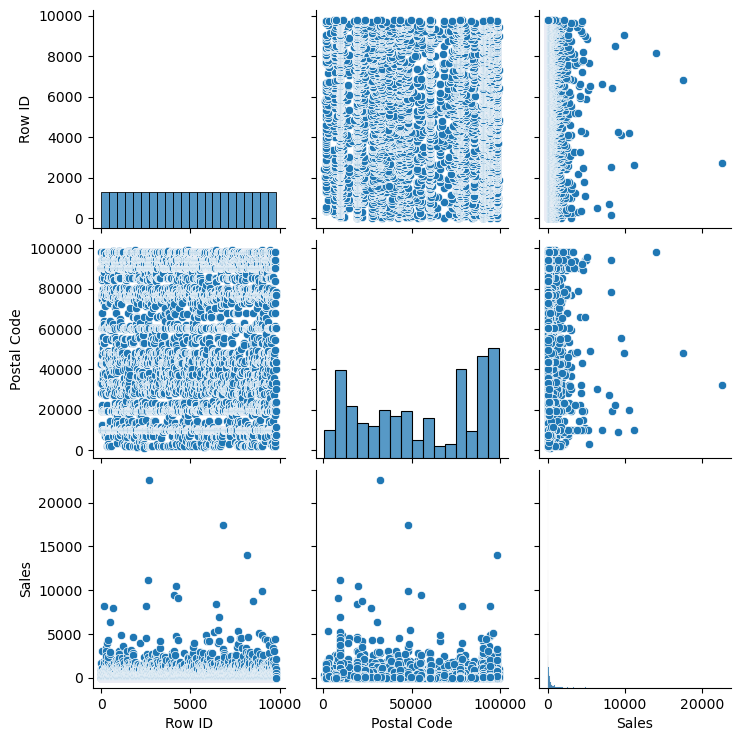

In [3]:
sbn.pairplot(data)

In [4]:
data=data.drop(["Row ID","Order ID","Customer ID","Product ID"],axis=1)
data
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [5]:
data.isnull().count()

Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9800
Region           9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
dtype: int64

In [6]:
data.describe()

,Postal Code,Sales
count,9789.000000,9800.000000
mean,55273.322403,230.769059
std,32041.223413,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [7]:
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
data ["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
data["Country"].unique()

array(['United States'], dtype=object)

In [10]:
data["City"].nunique()

529

In [11]:
data["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [12]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [13]:
data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
data["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [15]:
data.groupby("Category")["Sales"].sum().sort_values(ascending=False)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

<Axes: xlabel='Sub-Category', ylabel='Sales'>

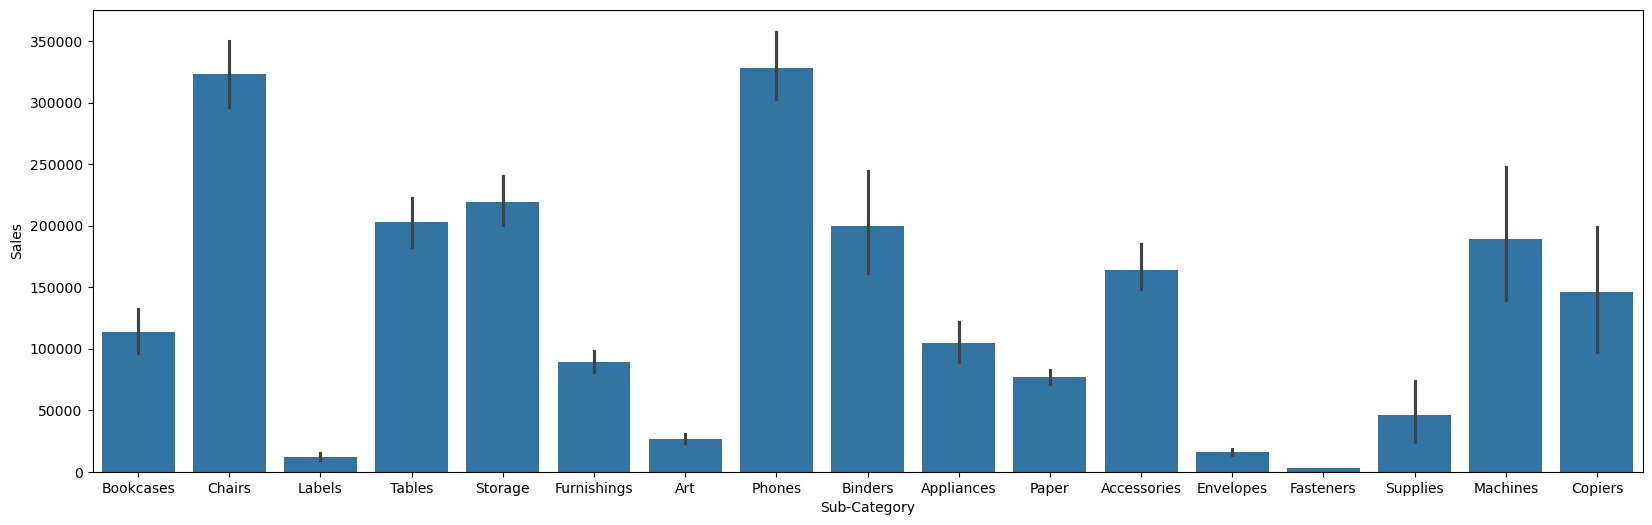

In [16]:
plt.figure(figsize=(20,6))
sbn.barplot(data=data, x='Sub-Category', y='Sales', estimator=sum)

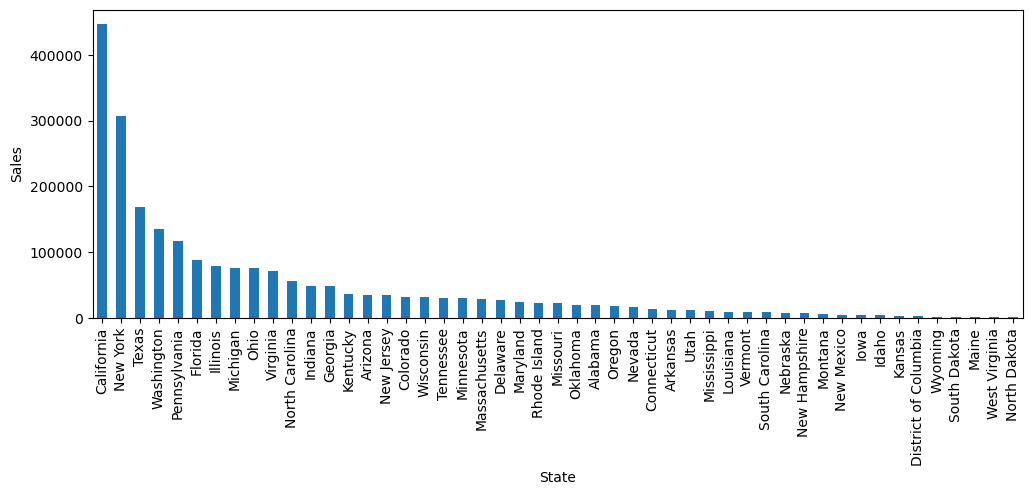

In [17]:
data.groupby("State")["Sales"].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sales'>

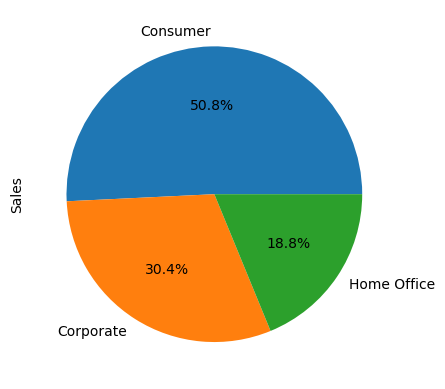

In [18]:
data.groupby('Segment')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')

In [19]:
data=data.sort_values("Order Date")
#data.set_index("Order Date",inplace=True)

In [20]:
#data["Sales"].resample("M").sum().plot(title="Mon")#M aaylık olduğunu belirtiyoruz
#D günlük W haftalaık Y yıllık

<Axes: ylabel='City'>

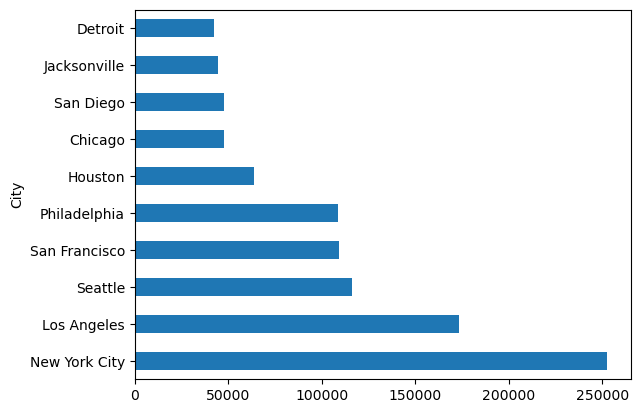

In [21]:
data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

<Axes: xlabel='Segment', ylabel='Sales'>

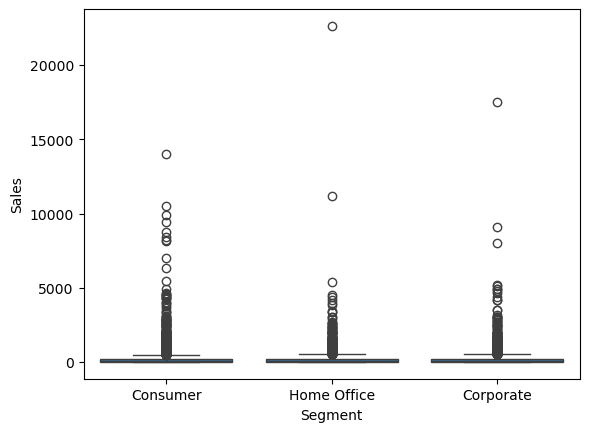

In [22]:
sbn.boxplot(x='Segment', y='Sales', data=data)

<Axes: xlabel='Category', ylabel='Sales'>

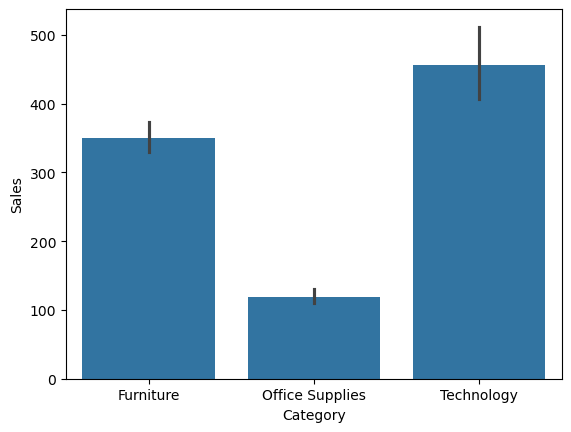

In [23]:
sbn.barplot(x='Category', y='Sales', data=data)

<Axes: xlabel='Sub-Category'>

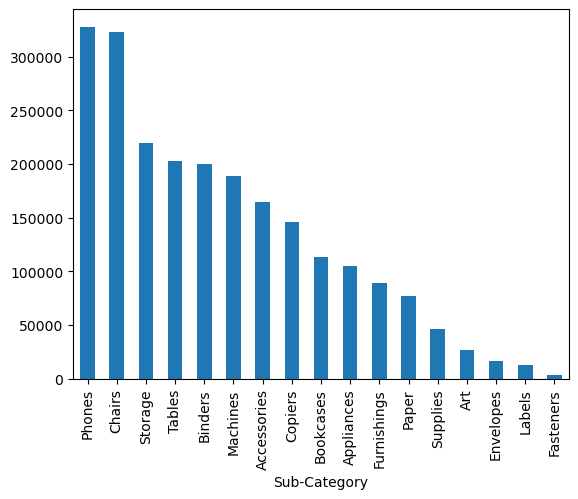

In [24]:
data.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

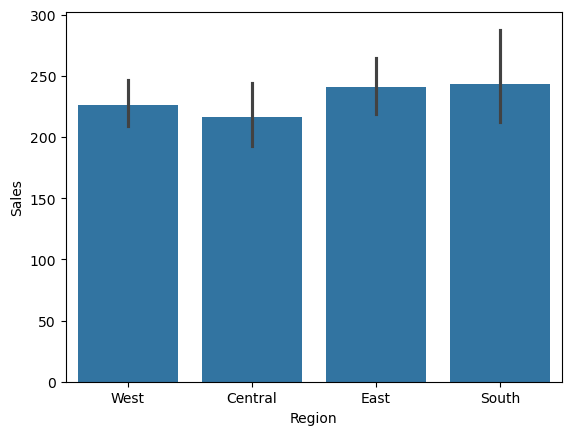

In [25]:
sbn.barplot(x='Region', y='Sales', data=data)
data=pd.DataFrame(data)
data.columns


In [26]:
data = data.drop(['Ship Date','Order Date','Customer Name','Country','State','Ship Mode','Postal Code','Region','Sub-Category','Category'], axis=1)
data

,Segment,City,Product Name,Sales
4009,Consumer,Los Angeles,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430
6682,Home Office,Franklin,Wilson Jones Easy Flow II Sheet Lifters,3.600
8069,Consumer,Huntsville,SAFCO Boltless Steel Shelving,454.560
8070,Consumer,Huntsville,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420
8071,Consumer,Huntsville,Office Star - Contemporary Task Swivel Chair,310.744
...,...,...,...,...
1153,Corporate,Reno,Lock-Up Easel 'Spel-Binder',159.768
2821,Consumer,Anaheim,Adtran 1202752G1,302.376
1152,Corporate,Reno,"Crayola Anti Dust Chalk, 12/Pack",3.640
5738,Consumer,San Francisco,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=data["Segment"].values
y=le.fit_transform(y)
data=data.drop("Segment",axis=1)
y=pd.DataFrame(y)
y

,0
0,0
1,2
2,0
3,0
4,0
...,...
9795,1
9796,0
9797,1
9798,0


In [29]:
for col in ["Product Name","City"]:
    data[col] = le.fit_transform(data[col])
x=data[:]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
scaler=StandardScaler()
rfc=RandomForestClassifier()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rfc.fit(x_train_scaled, y_train)
y_pred = rfc.predict(x_test_scaled)
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Consumer", "Corporate", "Home Office"]))

C:\Users\220201304\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.4483611626468769
              precision    recall  f1-score   support

    Consumer       0.51      0.72      0.60      1657
   Corporate       0.32      0.22      0.26      1002
 Home Office       0.16      0.06      0.09       575

    accuracy                           0.45      3234
   macro avg       0.33      0.33      0.32      3234
weighted avg       0.39      0.45      0.40      3234

